<a href="https://www.kaggle.com/code/leminhtri2702/notebookd08a550ba6?scriptVersionId=96337421" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [31]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [53]:
data_train='../input/traicayvietnam2/train'
data_validation='../input/traicayvietnam2/test'
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)


'../input/traicayvietnam2/test'

In [54]:
# tạo lí tạo dữ liệu training
traindata=train.flow_from_directory(data_train,
                                    target_size=(150,150),
                                    batch_size=10,
                                    class_mode='categorical',)
validationdata=validation.flow_from_directory(data_validation,
                                              target_size=(150,150),
                                              batch_size=10,
                                              class_mode='categorical',)


Found 100 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [55]:
print(validationdata.class_indices)

{'cam': 0, 'chuoi': 1, 'dau': 2, 'dauhau': 3, 'dua': 4, 'mangcut': 5, 'mít': 6, 'thanh long': 7, 'thơm': 8, 'táo': 9}


In [56]:
#xử lí dữ liệu training
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train, 11)


In [101]:

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same', input_shape = (150,150,3)))
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 37, 37, 128)     

In [102]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history=model.fit(traindata,batch_size=10,epochs=10,verbose=1,validation_data=validationdata)

Epoch 1/10
10/10 [==============================] - 4s 352ms/step - loss: 30.5276 - accuracy: 0.1100 - val_loss: 2.2653 - val_accuracy: 0.3000
Epoch 2/10
10/10 [==============================] - 3s 326ms/step - loss: 2.2619 - accuracy: 0.2000 - val_loss: 1.8307 - val_accuracy: 0.4600
Epoch 3/10
10/10 [==============================] - 3s 289ms/step - loss: 2.9626 - accuracy: 0.2600 - val_loss: 2.2101 - val_accuracy: 0.2700
Epoch 4/10
10/10 [==============================] - 3s 290ms/step - loss: 2.0307 - accuracy: 0.3100 - val_loss: 1.3298 - val_accuracy: 0.5800
Epoch 5/10
10/10 [==============================] - 4s 370ms/step - loss: 1.4688 - accuracy: 0.4800 - val_loss: 2.2932 - val_accuracy: 0.3100
Epoch 6/10
10/10 [==============================] - 3s 295ms/step - loss: 1.5897 - accuracy: 0.5200 - val_loss: 2.0340 - val_accuracy: 0.4200
Epoch 7/10
10/10 [==============================] - 3s 283ms/step - loss: 1.1161 - accuracy: 0.6900 - val_loss: 0.5442 - val_accuracy: 0.7600
Epoch

In [103]:
model.save('10LOAITRAICAY.h5')
from keras.models import load_model
CNN_Fruit=load_model('10LOAITRAICAY.h5')

In [104]:
score = model.evaluate(validationdata,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  0.4404717683792114
Độ chính xác kiểm tra là:  0.8399999737739563


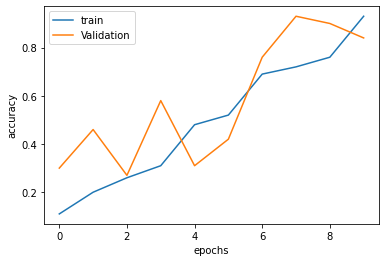

In [105]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

array([1])

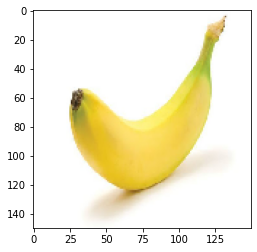

In [108]:
from keras.models import load_model
img=load_img('../input/test12/anh-qua-chuoi.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)
np.argmax(CNN_Fruit.predict(img),axis=1)
pred = model.predict(img)
test=np.argmax(model.predict(img),axis=1)
np.argmax(model.predict(img),axis=-1)

array([8])

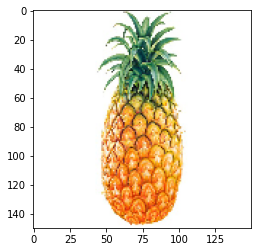

In [114]:
from keras.models import load_model
img=load_img('../input/traithomvn/thom.1.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)
np.argmax(CNN_Fruit.predict(img),axis=1)
pred = model.predict(img)
test=np.argmax(model.predict(img),axis=1)
np.argmax(model.predict(img),axis=-1)